In [64]:
# Python
import os

# specify the directory you want to scan
data_directory = 'data'

# use os.listdir to get the list of files
files = os.listdir(data_directory)

foco_files = []
jfet_files = []
for file in files:
    if file.endswith('.csv'):
        if 'jfet' in file:
            jfet_files.append(file)
print(jfet_files)
print(len(jfet_files))

['jfet.csv', 'jfet1.csv', 'jfet2.csv', 'jfet3.csv', 'jfet4.csv', 'jfet5.csv', 'jfet6.csv', 'jfet7.csv', 'jfet8.csv', 'jfet9.csv', 'jfet10.csv', 'jfet11.csv', 'jfet12.csv', 'jfet13.csv', 'jfet14.csv', 'jfet15.csv', 'jfet16.csv', 'jfet17.csv', 'jfet18.csv', 'jfet19.csv']
20


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x-axis  1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
dtypes: float64(5)
memory usage: 46.9 KB
None


<AxesSubplot:xlabel='x-axis'>

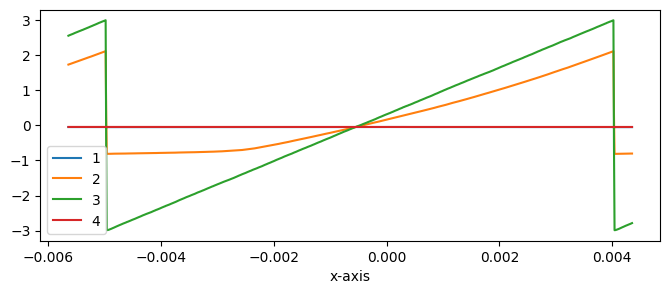

In [65]:
import pandas as pd
import numpy as np

def fileToDataFrame(file):
    df = pd.read_csv(os.path.join(data_directory, file))
    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    return df

df_jfet0 = fileToDataFrame(jfet_files[0])

print(df_jfet0.info())

# plot the data
df_jfet0.plot(x='x-axis', figsize=(8, 3))

<AxesSubplot:xlabel='x-axis'>

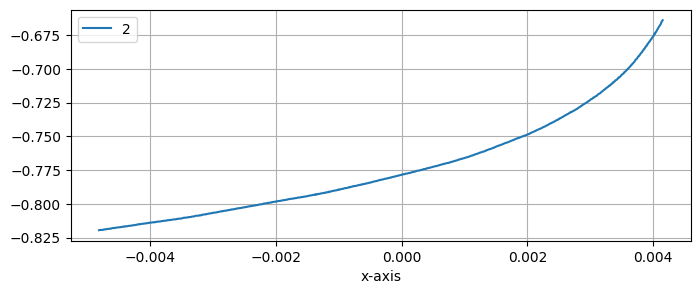

In [84]:
def getExactJFETData(file):
    # find the corresponding index of the minimum value of the x-axis for the first len//2 values
    df = fileToDataFrame(file)
    df1 = df.iloc[:len(df)//2]
    min_index = df1['3'].idxmin()

    # find the corresponding index of the maximum value of the x-axis for the second len//2 values
    df2 = df.iloc[len(df)//2:]
    max_index = df2['3'].idxmax()

    # return the data between the two indices
    return df.iloc[min_index:max_index]

df_jfet0 = getExactJFETData(jfet_files[17])
df_jfet0.plot(x='x-axis', y='2', figsize=(8, 3), grid=True)

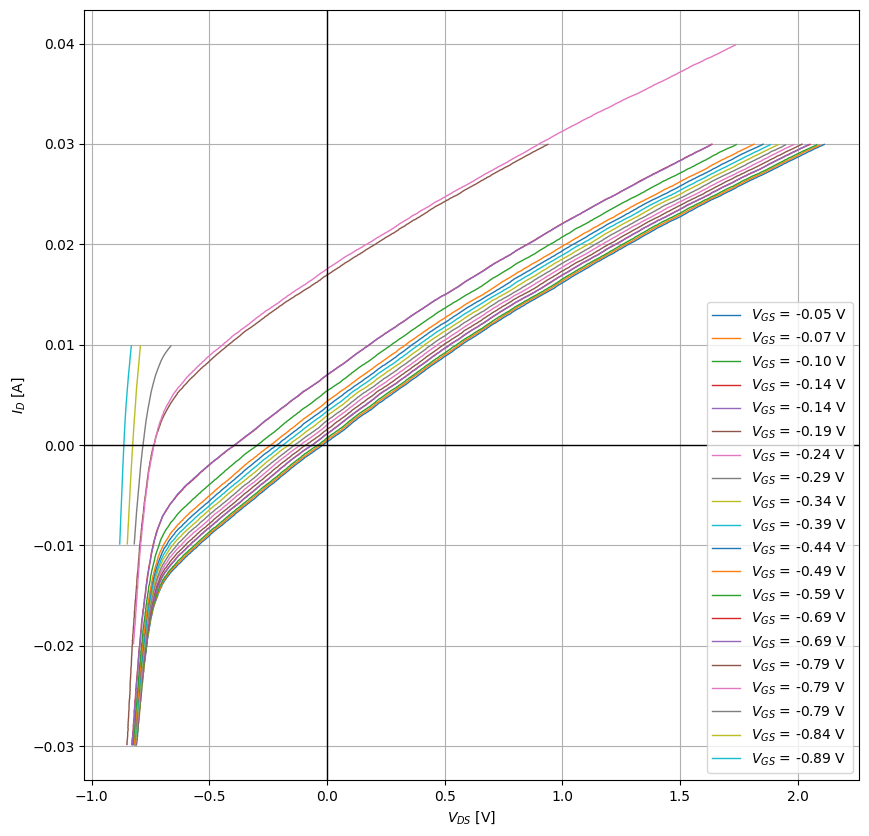

In [90]:
def getJFETCurveValues(df_jfet):
    Vdd = df_jfet['3'].values
    Vds = df_jfet['2'].values
    V1, V4 = df_jfet['1'].values, df_jfet['4'].values
    Vgs = np.mean((V1 + V4)/2)
    return Vdd, Vds, Vgs

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for file in jfet_files:
    df = getExactJFETData(file)
    Vdd, Vds, Vgs = getJFETCurveValues(df)
    Id = 0
    if np.max(Vdd) > 9:
        Id = Vdd/1000
    else:
        Id = Vdd/100
    plt.plot(Vds, Id, label=f'$V_{{GS}}$ = {Vgs:.2f} V', linewidth=1)

plt.xlabel('$V_{{DS}}$ [V]')
plt.ylabel('$I_D$ [A]')
plt.grid(which='both', axis='both')
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.legend(loc='lower right')
plt.show()